# Preprocessing of dataset

In [44]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [45]:
# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [46]:
# Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [47]:
# Checking for empty rows
empty_rows = df.isnull().all(axis=1)
print(f"Empty rows: {empty_rows}")

Empty rows: 0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool


In [48]:
# Drop diabetes column
X = df.drop("diabetes", axis=1)
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [49]:
# Standardizing input features
num_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
bin_features = ["hypertension", "heart_disease"]
cat_features = ["gender", "smoking_history"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("bin", "passthrough", bin_features), 
    ("cat", OneHotEncoder(), cat_features)
])

X_preprocessed = preprocessor.fit_transform(X)
print(X_preprocessed)

[[ 1.69270354e+00 -3.21055792e-01  1.00170572e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 5.38006427e-01 -1.15583678e-04  1.00170572e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.16690686e-01 -1.15583678e-04  1.61108022e-01 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 ...
 [ 1.07094356e+00  7.67292549e-02  1.61108022e-01 ...  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.94336396e-01  1.22036126e+00 -1.42668764e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 6.71240710e-01 -7.36921977e-01  1.00170572e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


# Agglomerative Hierarchical Clustering (AHC)

In [50]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from mpl_toolkits.mplot3d import Axes3D

## Scatter plots before clustering

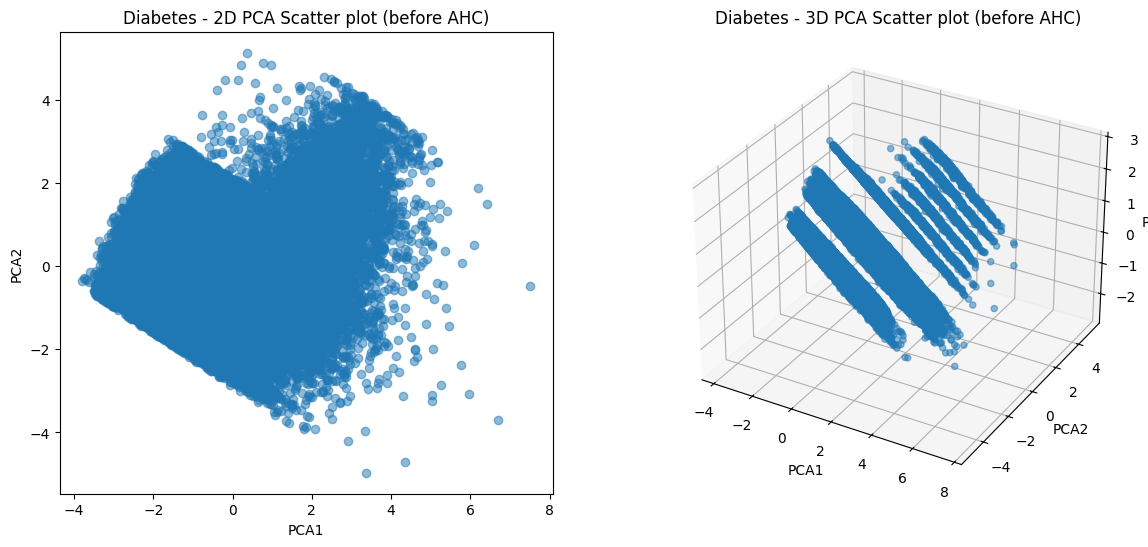

In [51]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_preprocessed)

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_preprocessed)

# 2D scatter plot before clustering
fig = plt.figure(figsize=(14, 6))

ax2 = fig.add_subplot(1, 2, 1)
ax2.scatter(
    X_pca2[:,0],
    X_pca2[:,1],
    alpha=0.5
)
ax2.set_xlabel("PCA1")
ax2.set_ylabel("PCA2")
ax2.set_title("Diabetes - 2D PCA Scatter plot (before AHC)")

ax3 = fig.add_subplot(1, 2, 2, projection="3d")
ax3.scatter(
    X_pca3[:,0],
    X_pca3[:,1],
    X_pca3[:,2],
    alpha=0.5
)
ax3.set_xlabel("PCA1")
ax3.set_ylabel("PCA2")
ax3.set_zlabel("PCA3")
ax3.set_title("Diabetes - 3D PCA Scatter plot (before AHC)")

plt.show()

## Training

### Sampling dataset

In [52]:
sample_size = 10000

np.random.seed(42)
sample_idx = np.random.choice(len(X_preprocessed), size=sample_size, replace=False)

X_sample = X_preprocessed[sample_idx]
X_sample

array([[-1.2828621 , -0.97951058,  0.25450777, ...,  0.        ,
         0.        ,  0.        ],
       [-1.72697637, -0.95238888, -0.49269019, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.93770927, -0.30146789, -1.89368636, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.37168495, -0.66761095, -1.89368636, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.89329785, -0.71432055,  0.16110802, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.22712644, -0.59227287, -0.95968891, ...,  1.        ,
         0.        ,  0.        ]])

### Determining the optimal number of clusters
- Silhouette scores  
- Davies-Bouldin index 
- Calinski-Harabasz index

In [53]:
candidate_clusters = range(2, 50)
sil_list_clusters = []
dbi_list_clusters = []
chi_list_clusters = []

for n in candidate_clusters:
    ahc_clusters = AgglomerativeClustering(n_clusters=n, linkage="ward")
    labels_clusters = ahc_clusters.fit_predict(X_sample)

    sil_clusters = silhouette_score(X_sample, labels_clusters)
    dbi_clusters = davies_bouldin_score(X_sample, labels_clusters)
    chi_clusters = calinski_harabasz_score(X_sample, labels_clusters)

    sil_list_clusters.append(sil_clusters)
    dbi_list_clusters.append(dbi_clusters)
    chi_list_clusters.append(chi_clusters)

    print(f"Number of clusters: {n}, Silhouette score: {sil_clusters:.3f}, Davies-Bouldin score: {dbi_clusters:.3f}, Calinski-Harabasz score: {chi_clusters:.3f}")

max_sil_clusters = max(sil_list_clusters)
min_dbi_clusters = min(dbi_list_clusters)
max_chi_clusters = max(chi_list_clusters)

optimal_clusters_sil = candidate_clusters[sil_list_clusters.index(max_sil_clusters)]
optimal_clusters_dbi = candidate_clusters[dbi_list_clusters.index(min_dbi_clusters)]
optimal_clusters_chi = candidate_clusters[chi_list_clusters.index(max_chi_clusters)]

print()
print(f"Highest Silhouette score: {max_sil_clusters:.3f}, Optimal number of clusters: {optimal_clusters_sil}")
print(f"Lowest Davies-Bouldin score: {min_dbi_clusters:.3f}, Optimal number of clusters: {optimal_clusters_dbi}")
print(f"Highest Calinski-Harbasz score: {max_chi_clusters:.3f}, Optimal number of clusters: {optimal_clusters_chi}")

Number of clusters: 2, Silhouette score: 0.117, Davies-Bouldin score: 2.515, Calinski-Harabasz score: 1441.207
Number of clusters: 3, Silhouette score: 0.098, Davies-Bouldin score: 2.044, Calinski-Harabasz score: 1330.149
Number of clusters: 4, Silhouette score: 0.113, Davies-Bouldin score: 1.882, Calinski-Harabasz score: 1313.676
Number of clusters: 5, Silhouette score: 0.120, Davies-Bouldin score: 1.799, Calinski-Harabasz score: 1316.665
Number of clusters: 6, Silhouette score: 0.110, Davies-Bouldin score: 1.893, Calinski-Harabasz score: 1246.285
Number of clusters: 7, Silhouette score: 0.107, Davies-Bouldin score: 1.976, Calinski-Harabasz score: 1198.297
Number of clusters: 8, Silhouette score: 0.102, Davies-Bouldin score: 2.021, Calinski-Harabasz score: 1112.104
Number of clusters: 9, Silhouette score: 0.085, Davies-Bouldin score: 2.048, Calinski-Harabasz score: 1041.932
Number of clusters: 10, Silhouette score: 0.081, Davies-Bouldin score: 2.021, Calinski-Harabasz score: 990.985
N

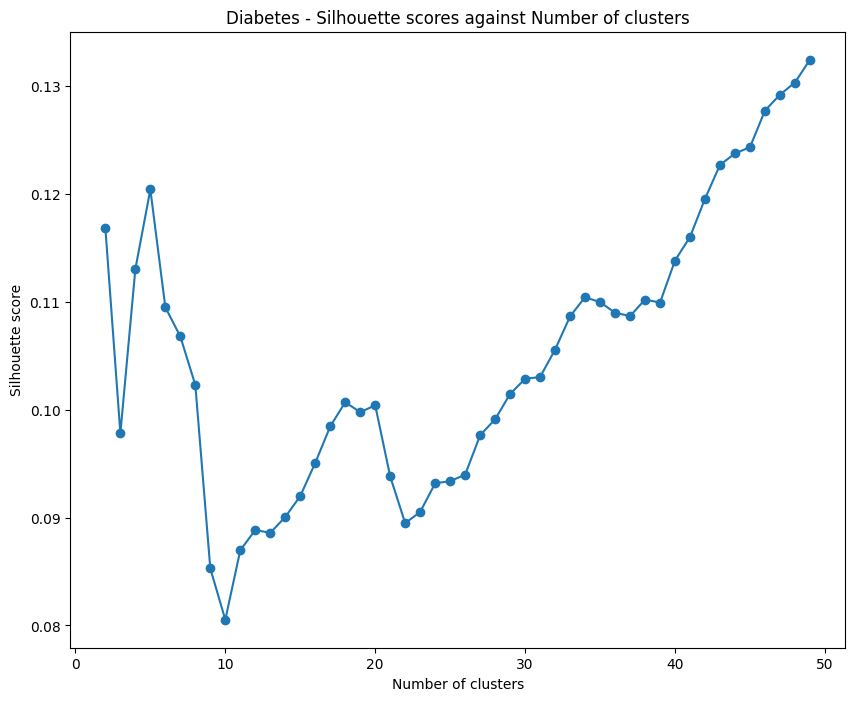

In [54]:
plt.figure(figsize=(10, 8))
plt.plot(candidate_clusters, sil_list_clusters, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Diabetes - Silhouette scores against Number of clusters")
plt.show()

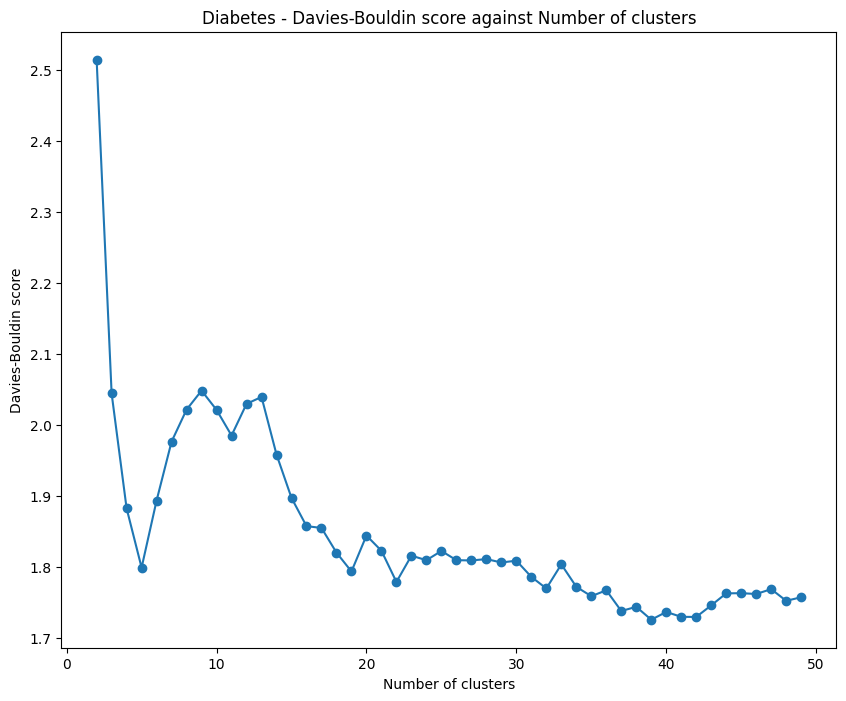

In [55]:
plt.figure(figsize=(10, 8))
plt.plot(candidate_clusters, dbi_list_clusters, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin score")
plt.title("Diabetes - Davies-Bouldin score against Number of clusters")
plt.show()

Text(0.5, 1.0, 'Diabetes - Calinski-Harabasz score against Number of clusters')

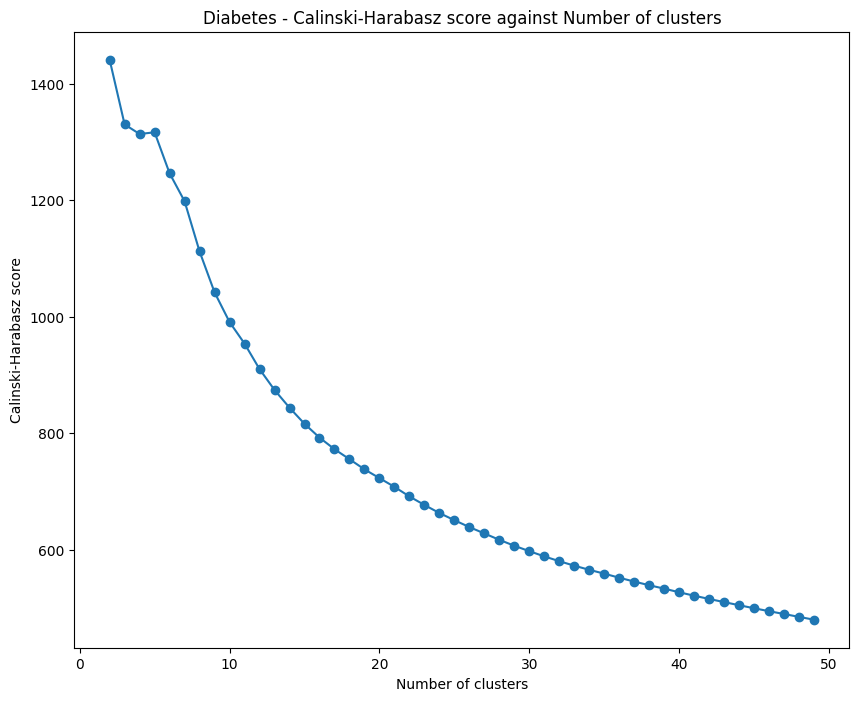

In [56]:
plt.figure(figsize=(10, 8))
plt.plot(candidate_clusters, chi_list_clusters, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz score")
plt.title("Diabetes - Calinski-Harabasz score against Number of clusters")

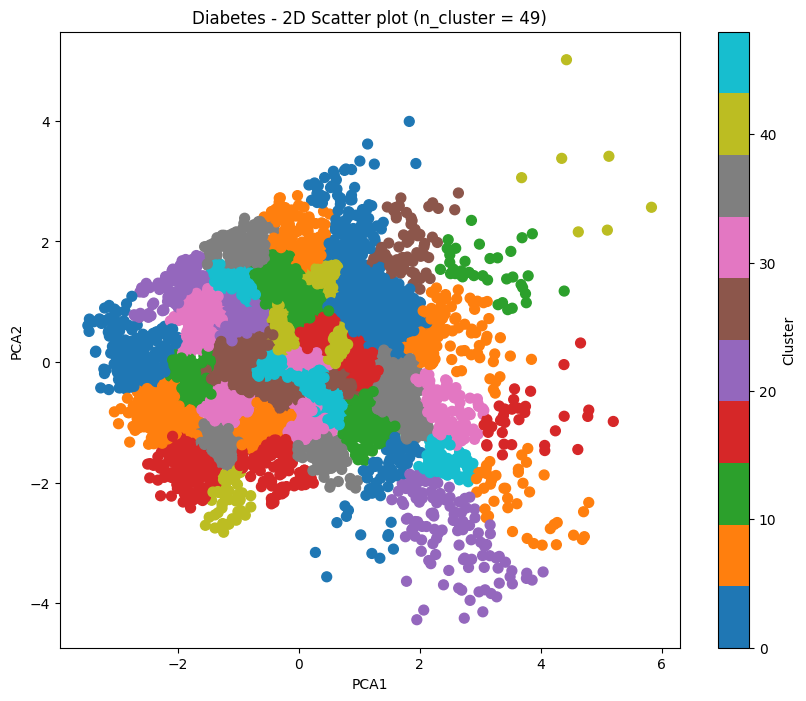

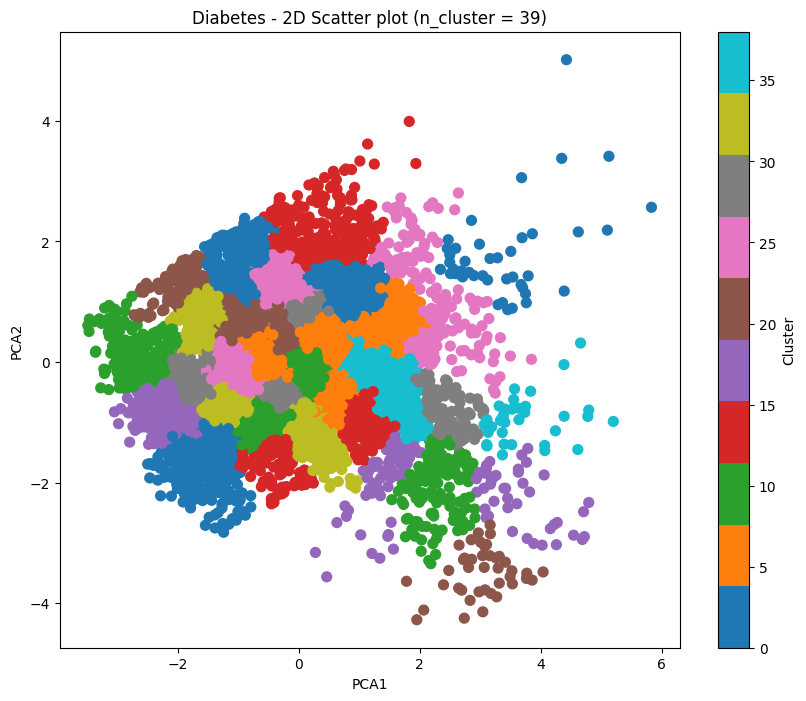

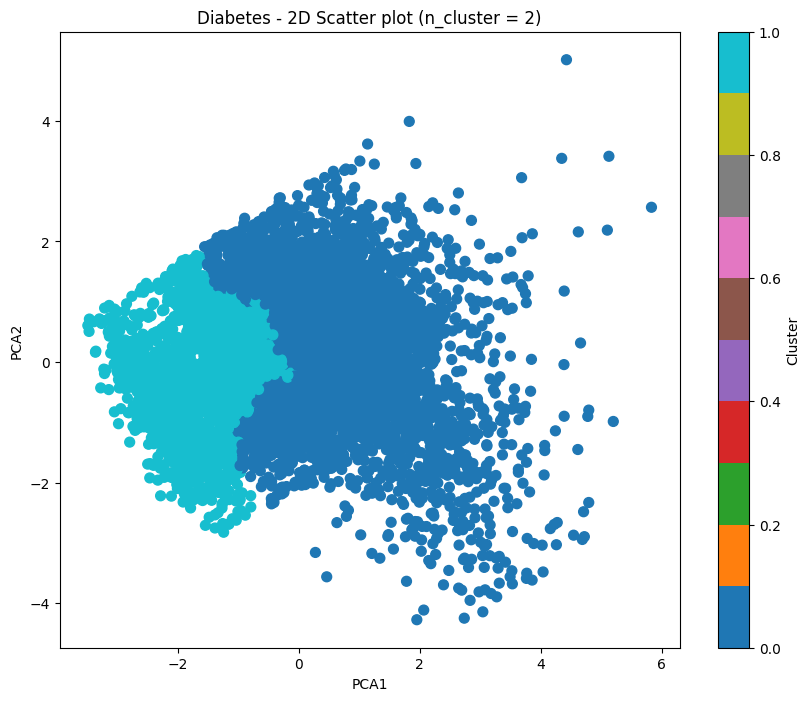

In [57]:
# Determining ultimate optimal number of clusters using by plotting 2D PCA scatter plots
optimal_clusters_options = [49, 39, 2] # Change according to the results above

pca2_sample = PCA(n_components=2)
X_pca2_sample = pca2_sample.fit_transform(X_sample)

for c in optimal_clusters_options:
    ahc_optimal_c = AgglomerativeClustering(n_clusters=c, linkage="ward")
    labels_optimal_c = ahc_optimal_c.fit_predict(X_pca2_sample)

    plt.figure(figsize=(10, 8))
    plt.scatter(
        X_pca2_sample[:,0],
        X_pca2_sample[:,1],
        c=labels_optimal_c,
        cmap="tab10",
        s=50
    )
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.title(f"Diabetes - 2D Scatter plot (n_cluster = {c})")
    plt.colorbar(label="Cluster")
    plt.show()


## Experimental analysis

### Analysis of AHC model performance on different linkage criterias 
(using optimal number of clusters)  
- ward, single, complete, average

Linkage method: Ward


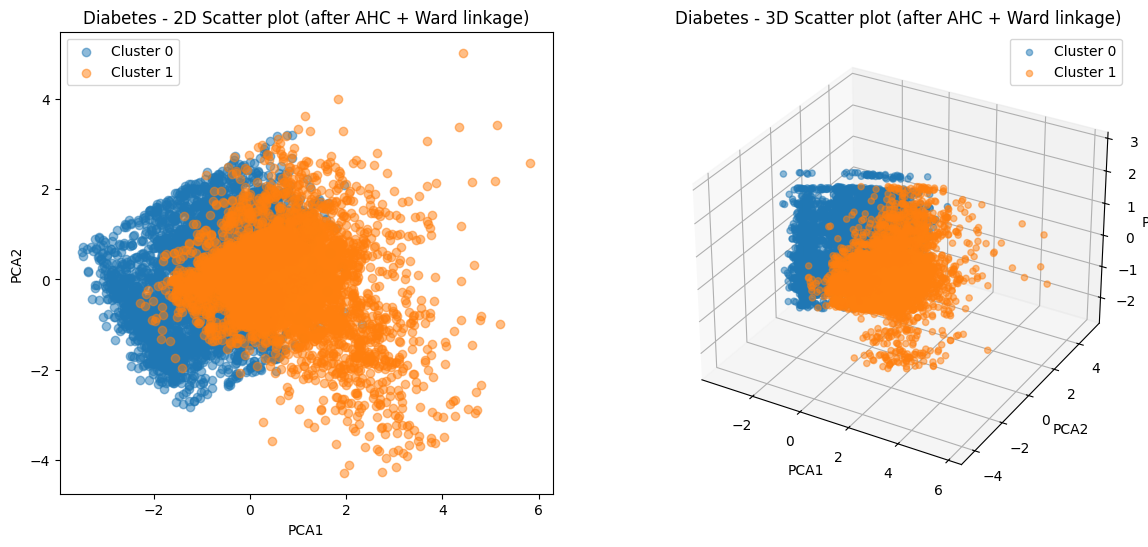

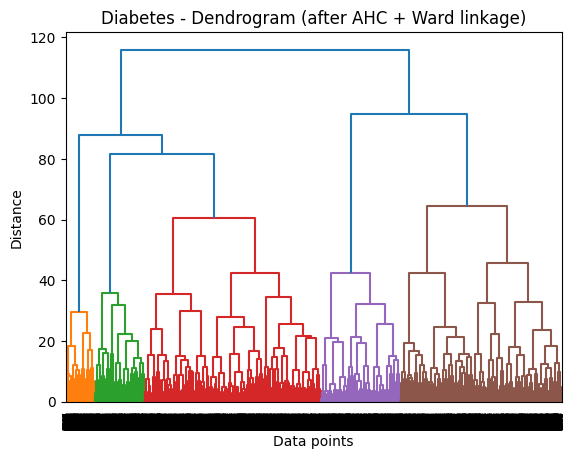

----------------------------------------------------------------------------------------------
Linkage method: Single


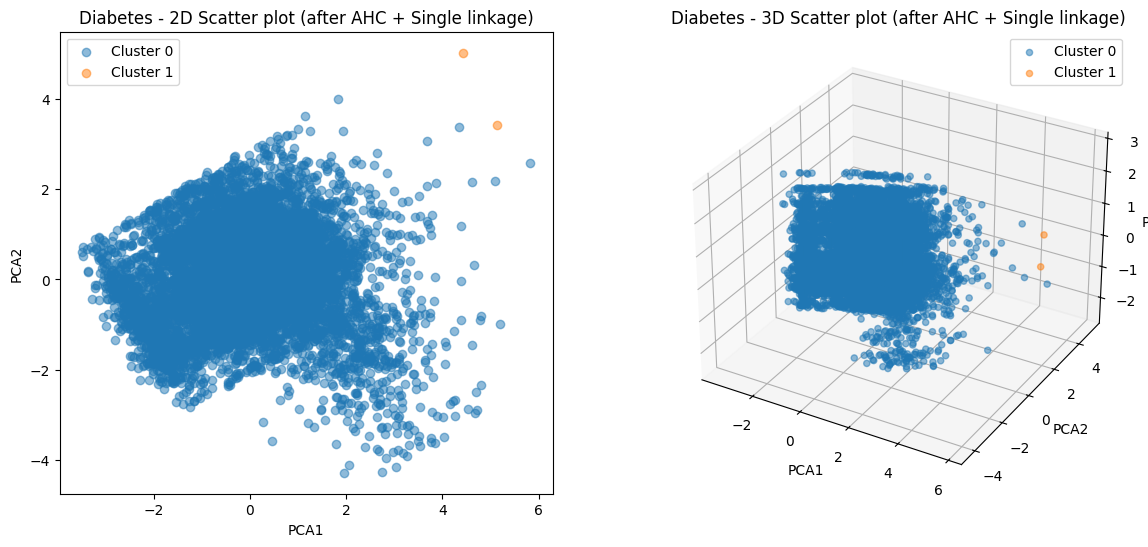

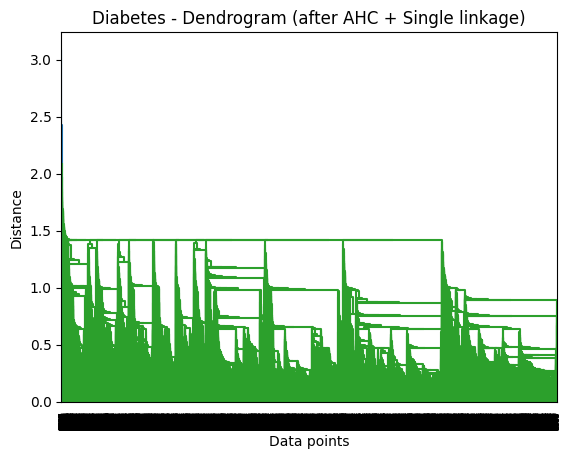

----------------------------------------------------------------------------------------------
Linkage method: Complete


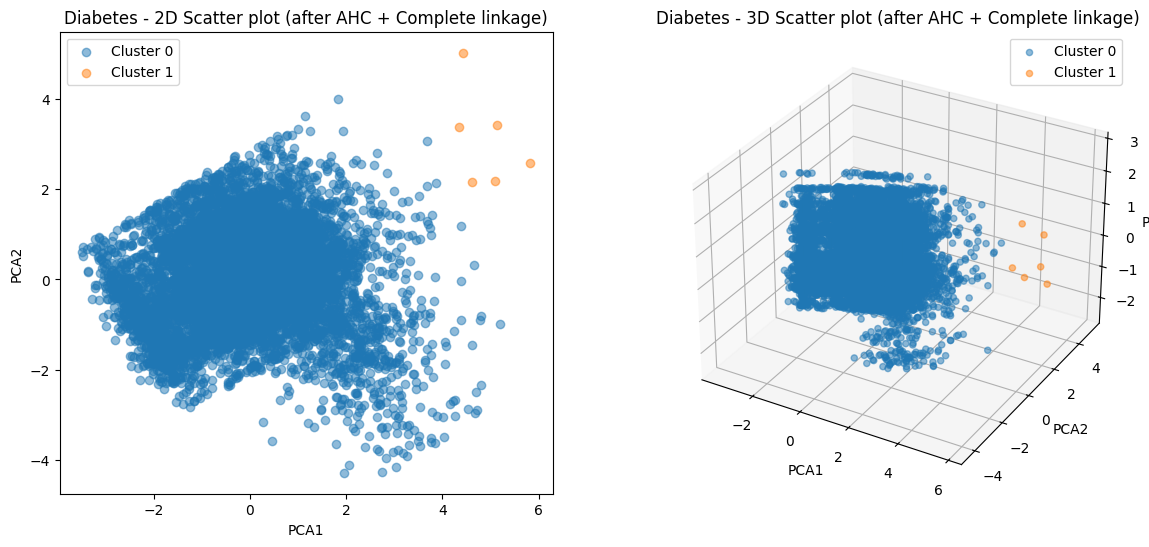

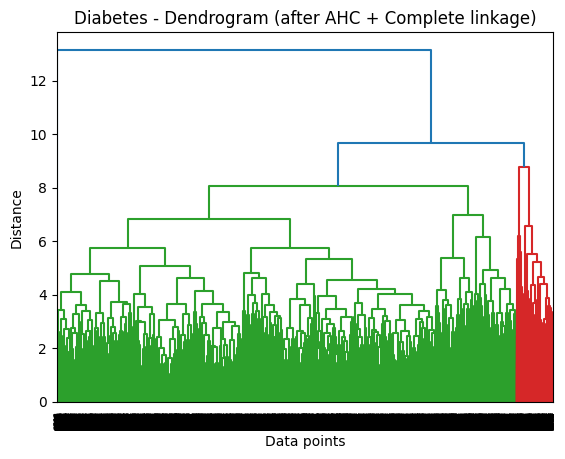

----------------------------------------------------------------------------------------------
Linkage method: Average


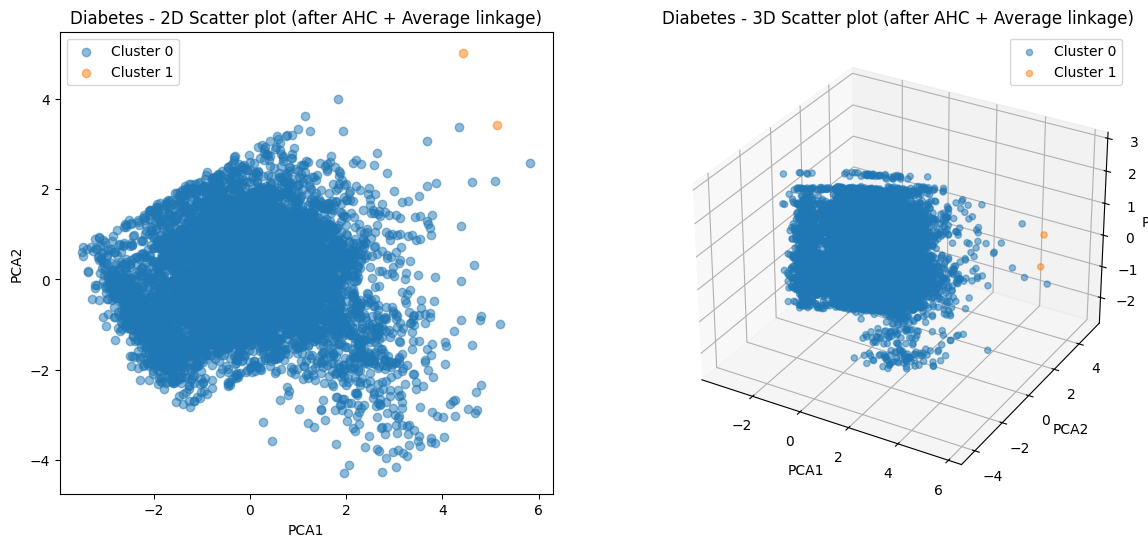

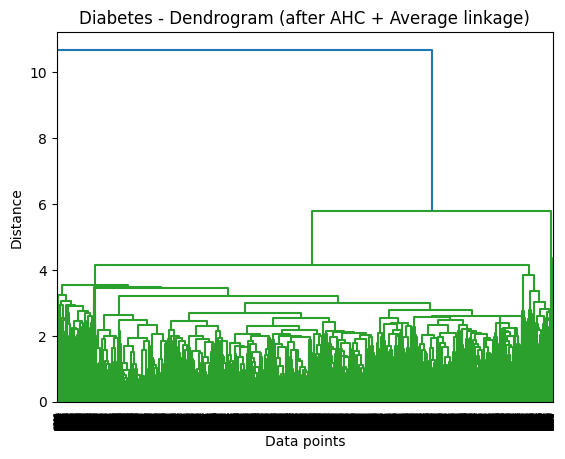

----------------------------------------------------------------------------------------------

Linkage method | Silhouette score | Davis-Bouldin score | Calinski-Harabasz score
ward         | 0.117 | 2.515 | 1441.207
single       | 0.705 | 0.299 | 41.006
complete     | 0.641 | 0.531 | 79.339
average      | 0.705 | 0.299 | 41.006


In [58]:
optimal_clusters = 2 # Change based on results above
linkage_methods = ["ward", "single", "complete", "average"]
sil_list_linkage = []
dbi_list_linkage = []
chi_list_linkage = []

pca3_sample = PCA(n_components=3)
X_pca3_sample = pca3_sample.fit_transform(X_sample)

for m in linkage_methods:
    print(f"Linkage method: {m.capitalize()}")

    # Conduct AHC
    ahc_linkage = AgglomerativeClustering(n_clusters=optimal_clusters, linkage=m)
    labels_linkage = ahc_linkage.fit_predict(X_sample)

    # Plot 2D PCA scatter plot
    fig_linkage = plt.figure(figsize=(14, 6))
    ax2_linkage = fig_linkage.add_subplot(1, 2, 1)
    
    for c in np.unique(labels_linkage):
        ax2_linkage.scatter(
            X_pca2_sample[labels_linkage == c, 0],
            X_pca2_sample[labels_linkage == c, 1],
            label=f"Cluster {c}",
            alpha=0.5,
        )
    
    ax2_linkage.set_xlabel("PCA1")
    ax2_linkage.set_ylabel("PCA2")
    ax2_linkage.set_title(f"Diabetes - 2D Scatter plot (after AHC + {m.capitalize()} linkage)")
    ax2_linkage.legend()

    # Plot 3D PCA scatter plot
    ax3_linkage = fig_linkage.add_subplot(1, 2, 2, projection="3d")

    for c in np.unique(labels_linkage):
        ax3_linkage.scatter(
            X_pca3_sample[labels_linkage == c, 0],
            X_pca3_sample[labels_linkage == c, 1],
            X_pca3_sample[labels_linkage == c, 2],
            label=f"Cluster {c}",
            alpha=0.5
        )
    
    ax3_linkage.set_xlabel("PCA1")
    ax3_linkage.set_ylabel("PCA2")
    ax3_linkage.set_zlabel("PCA3")
    ax3_linkage.set_title(f"Diabetes - 3D Scatter plot (after AHC + {m.capitalize()} linkage)")
    ax3_linkage.legend()

    plt.show()

    # Plot dendrogram
    Z_linkage = linkage(X_sample, method=m)
    dendrogram(Z_linkage)
    plt.xlabel("Data points")
    plt.ylabel("Distance")
    plt.title(f"Diabetes - Dendrogram (after AHC + {m.capitalize()} linkage)")
    plt.show()
    print("----------------------------------------------------------------------------------------------")

    # Silhouette score, DBI score, CHI score
    sil_linkage = silhouette_score(X_sample, labels_linkage)
    dbi_linkage = davies_bouldin_score(X_sample, labels_linkage)
    chi_linkage = calinski_harabasz_score(X_sample, labels_linkage)

    sil_list_linkage.append(sil_linkage)
    dbi_list_linkage.append(dbi_linkage)
    chi_list_linkage.append(chi_linkage)

print()
print("Linkage method | Silhouette score | Davis-Bouldin score | Calinski-Harabasz score")
for i, m in enumerate(linkage_methods):
    print(f"{m:<12} | {sil_list_linkage[i]:.3f} | {dbi_list_linkage[i]:.3f} | {chi_list_linkage[i]:.3f}")
# Should still rely on dendrogram and PCA scatter plots to determine best linkage method as dendrogram visualizes the full hierarchical process

### Analysis of AHC model performance on different number of principle components
(using optimal number of clusters and ward linkage)

In [59]:
n_features = X_sample.shape[1]
pca_comps = list(range(2, n_features+1))

sil_list_pca = []
dbi_list_pca = []
chi_list_pca = []

for n in pca_comps:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_sample)

    # AHC 
    ahc_pca = AgglomerativeClustering(n_clusters=optimal_clusters, linkage="ward")
    labels_pca = ahc_pca.fit_predict(X_pca)

    # Scores 
    sil_pca = silhouette_score(X_pca, labels_pca)
    dbi_pca = davies_bouldin_score(X_pca, labels_pca)
    chi_pca = calinski_harabasz_score(X_pca, labels_pca)

    sil_list_pca.append(sil_pca)
    dbi_list_pca.append(dbi_pca)
    chi_list_pca.append(chi_pca)

print("Number of components | Silhouette score | Davies-Bouldin score | Calinski-Harabasz score")
for i, n in enumerate(pca_comps):
    print(f"{n:<21} | {sil_list_pca[i]:.3f} | {dbi_list_pca[i]:.3f} | {chi_list_pca[i]:.3f}")

best_sil_pca = max(sil_list_pca)
best_dbi_pca = min(dbi_list_pca)
best_chi_pca = max(chi_list_pca)

n_pca_sil = pca_comps[sil_list_pca.index(best_sil_pca)]
n_pca_dbi = pca_comps[dbi_list_pca.index(best_dbi_pca)]
n_pca_chi = pca_comps[chi_list_pca.index(best_chi_pca)]

print()
print(f"Highest Silhouette score: {best_sil_pca:.3f}, Optimal number of components: {n_pca_sil}")
print(f"Lowest Davies-Bouldin score: {best_dbi_pca:.3f}, Optimal number of components: {n_pca_dbi}")
print(f"Highest Calinski-Harabasz score: {best_chi_pca:.3f}, Optimal number of components: {n_pca_chi}")

Number of components | Silhouette score | Davies-Bouldin score | Calinski-Harabasz score
2                     | 0.303 | 1.108 | 4497.314
3                     | 0.218 | 1.420 | 2820.894
4                     | 0.174 | 1.656 | 2100.553
5                     | 0.151 | 2.178 | 1836.656
6                     | 0.144 | 2.201 | 1796.964
7                     | 0.133 | 2.295 | 1577.663
8                     | 0.131 | 2.344 | 1535.268
9                     | 0.119 | 2.513 | 1443.903
10                    | 0.127 | 2.391 | 1485.698
11                    | 0.120 | 2.472 | 1481.655
12                    | 0.117 | 2.515 | 1441.218
13                    | 0.117 | 2.515 | 1441.218
14                    | 0.117 | 2.515 | 1441.218
15                    | 0.117 | 2.515 | 1441.218

Highest Silhouette score: 0.303, Optimal number of components: 2
Lowest Davies-Bouldin score: 1.108, Optimal number of components: 2
Highest Calinski-Harabasz score: 4497.314, Optimal number of components: 2


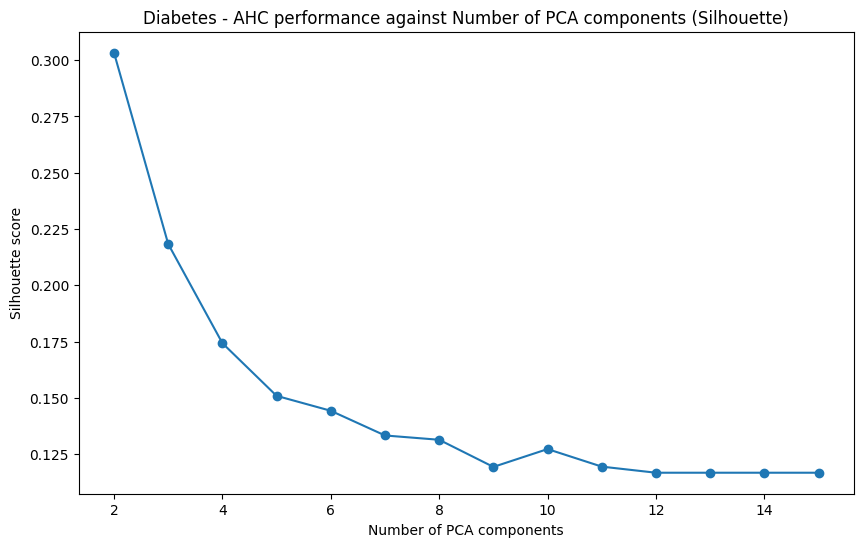

In [60]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(pca_comps, sil_list_pca, marker="o")
plt.xlabel("Number of PCA components")
plt.ylabel("Silhouette score")
plt.title("Diabetes - AHC performance against Number of PCA components (Silhouette)")
plt.show()

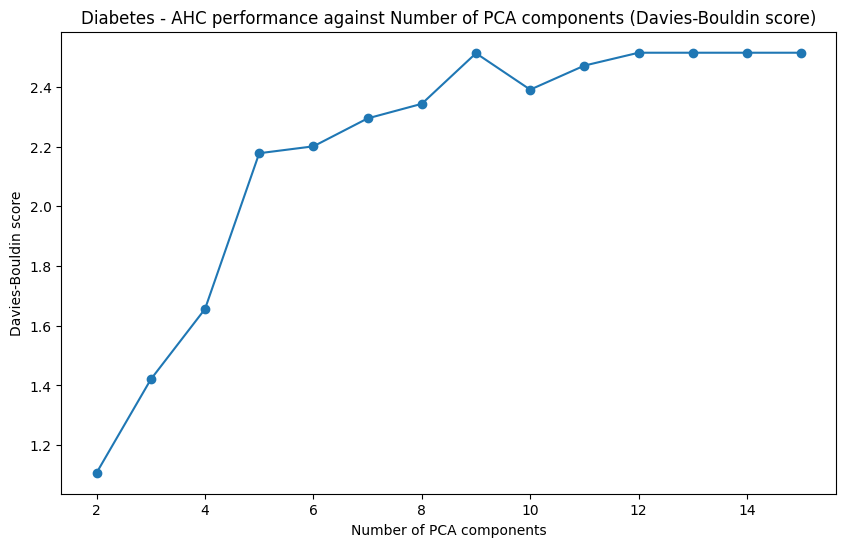

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(pca_comps, dbi_list_pca, marker="o")
plt.xlabel("Number of PCA components")
plt.ylabel("Davies-Bouldin score")
plt.title("Diabetes - AHC performance against Number of PCA components (Davies-Bouldin score)")
plt.show()

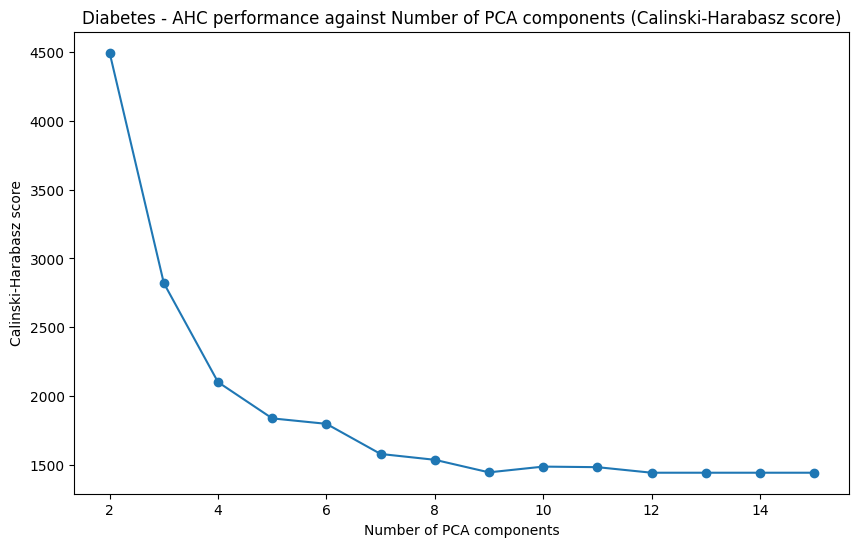

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(pca_comps, chi_list_pca, marker="o")
plt.xlabel("Number of PCA components")
plt.ylabel("Calinski-Harabasz score")
plt.title("Diabetes - AHC performance against Number of PCA components (Calinski-Harabasz score)")
plt.show()


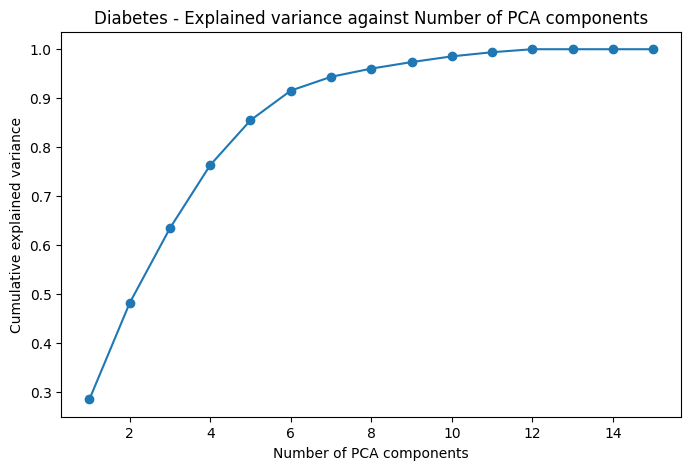

In [63]:
# Plotting variance against number of PCA components
pca_full = PCA().fit(X_sample)
explained_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker="o")
plt.xlabel("Number of PCA components")
plt.ylabel("Cumulative explained variance")
plt.title("Diabetes - Explained variance against Number of PCA components")
plt.show()

## Final AHC on the optimal configuration
- number of clusters  
- number of principle components  
- linkage criteria

In [64]:
pca_final = PCA(n_components=2) # Change according to results above
X_pca_final = pca_final.fit_transform(X_sample)

ahc_final = AgglomerativeClustering(n_clusters=optimal_clusters, linkage="ward")
labels_final = ahc_final.fit_predict(X_pca_final)


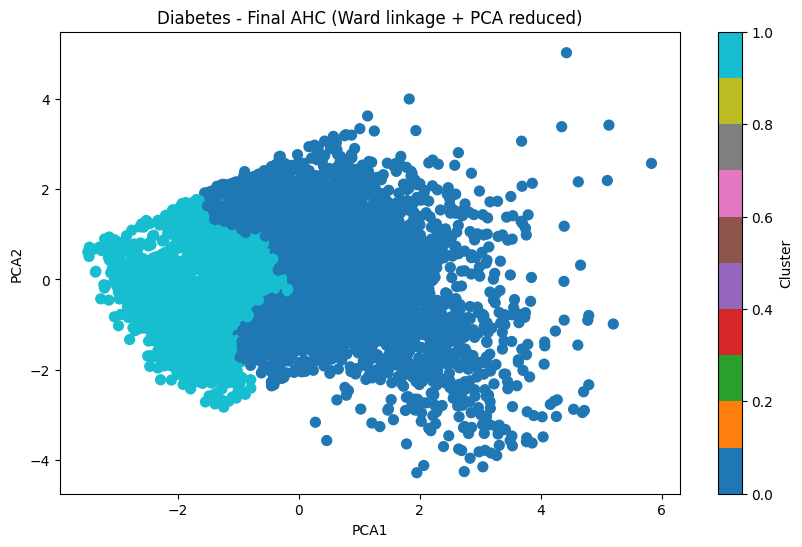

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_pca_final[:,0],
    X_pca_final[:,1],
    c=labels_final,
    cmap="tab10",
    s=50
)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Diabetes - Final AHC (Ward linkage + PCA reduced)")
plt.colorbar(label="Cluster")
plt.show()

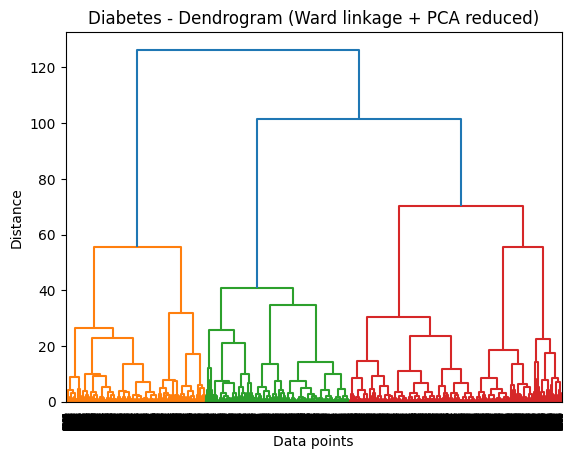

In [66]:
# Plot dendrogram
Z_linkage = linkage(X_pca_final, method="ward")
dendrogram(Z_linkage)
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.title(f"Diabetes - Dendrogram (Ward linkage + PCA reduced)")
plt.show()

In [67]:
# Cluster analysis

# Feature names after transformation
encoded_cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_features)

all_features = num_features + bin_features + list(encoded_cat_features)
df_sample = pd.DataFrame(X_sample, columns=all_features)
df_sample["Cluster"] = labels_final
df_sample["Diabetes"] = df.loc[df_sample.index, "diabetes"].values
cluster_summary = df_sample.groupby("Cluster").mean().round(2)
print(cluster_summary)

          age   bmi  HbA1c_level  blood_glucose_level  hypertension  \
Cluster                                                               
0        0.39  0.32         0.15                 0.15           0.1   
1       -1.05 -0.81        -0.34                -0.37           0.0   

         heart_disease  gender_Female  gender_Male  gender_Other  \
Cluster                                                            
0                 0.05           0.60         0.40           0.0   
1                 0.00           0.58         0.42           0.0   

         smoking_history_No Info  smoking_history_current  \
Cluster                                                     
0                           0.27                     0.11   
1                           0.58                     0.07   

         smoking_history_ever  smoking_history_former  smoking_history_never  \
Cluster                                                                        
0                        0.05        

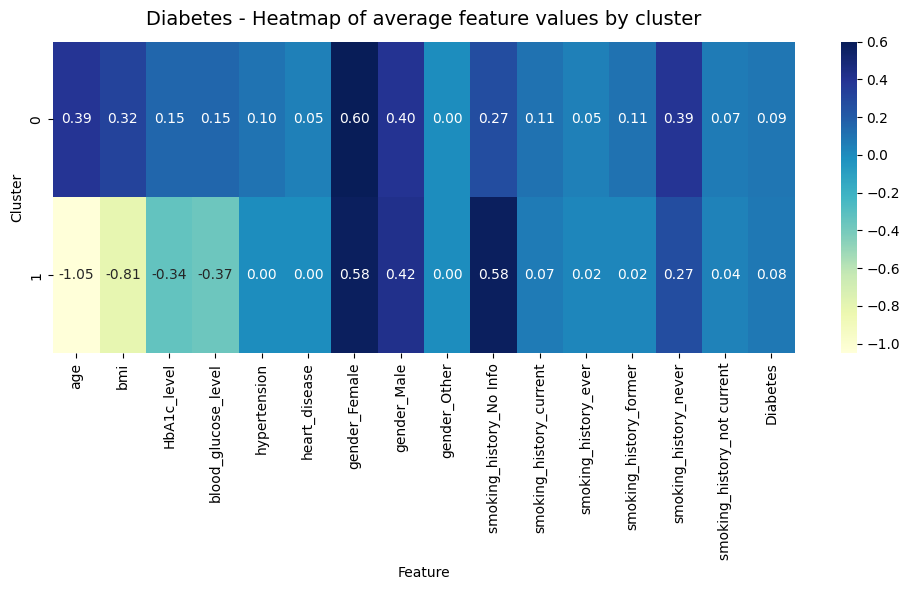

In [68]:
# Heatmap for cluster analysis
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Diabetes - Heatmap of average feature values by cluster", fontsize=14, pad=12)
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()
